---
# DELL LEAD - Curso de Visualização de Dados 📊

<b> Oficina - Aula 2.1 </b>

Este notebook tem como objetivo analisar os [dados](https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro03/oficina/arquivos/dadosoficina03.txt) acerca dos filmes lançados entre 2007 e 2011, utilizando as bibliotecas Pandas 🐼, Matplotlib e Seaborn.

Por: Pedro Florencio de Almeida Neto

---

<b>(Questão 1)</b> Importe as bibliotecas pandas, matplotlib, seaborn e use o comando mágico %matplotlib inline para exibir as visualizações no notebook. Carregue os dados em um DataFrame. Os dados estão disponibilizados no link: [dados](https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro03/oficina/arquivos/dadosoficina03.txt). Você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente.

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [352]:
df = pd.read_json('https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro03/oficina/arquivos/dadosoficina03.txt')
df.head()

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Film               30 non-null     object
 1   Year               30 non-null     int64 
 2   Genre              30 non-null     object
 3   Worldwide_Gross_M  30 non-null     int64 
 4   Budget_M           30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


🖋 O dataset é composto por 5 atributos: 
* <i>Film</i>: Nome do filme (atributo categórico)
* <i>Year</i>: Ano de lançamento (atributo categórico)
* <i>Genre</i>: Gênero do filme (atributo categórico)
* <i>Worldwide_Gross_M</i>: Bilheteria em milhões de dólares (atributo quantitativo)
* <i>Budget_M</i>: Orçamento em milhões de dólares (atributo quantitativo)

---

<b>(Questão 2)</b> Crie uma visualização que mostre o orçamento de todos os filmes do conjunto de dados. Qual o filme com maior orçamento e com menor orçamento?

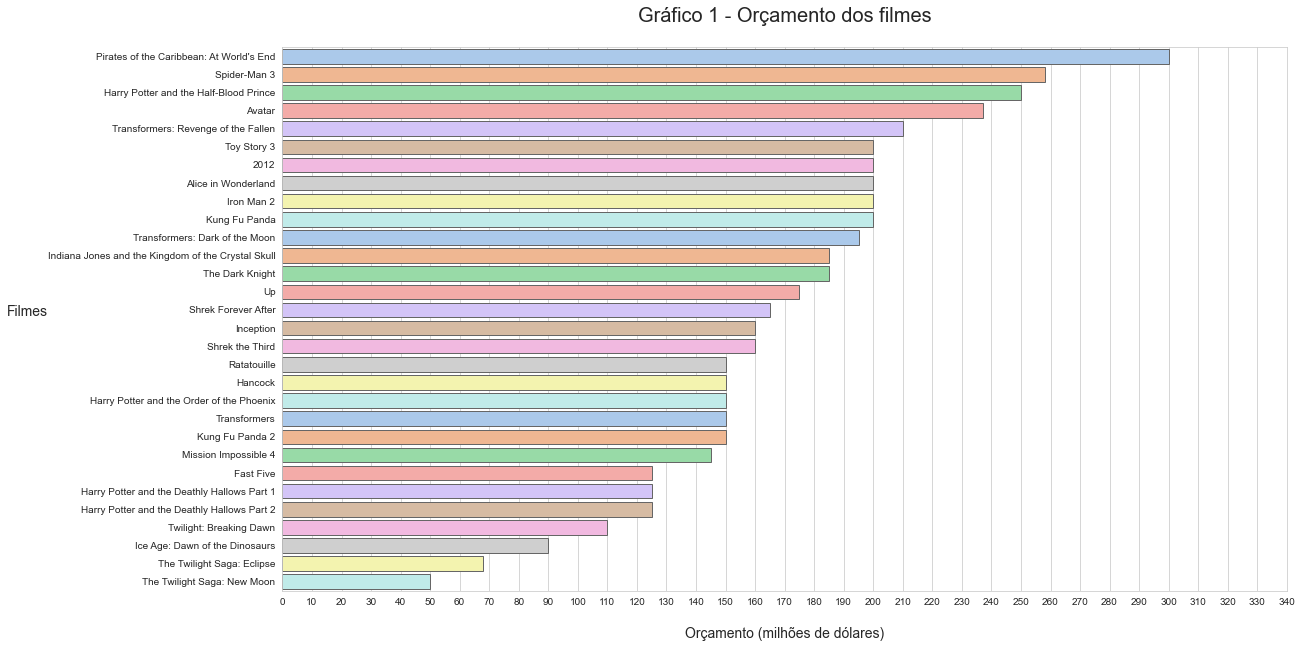

In [354]:
# Criação de um novo DataFrame, que ordena os filmes de acordo com o orçamento
df2 = df.sort_values(by='Budget_M',ascending=False)

# Definindo tamanho do gráfico, ativando o grid e escolhendo o barplot usando Seaborn
plt.figure(figsize=(18,10))
sns.set_style('whitegrid')
sns.barplot(x='Budget_M',y='Film',data=df2,palette='pastel',edgecolor='0.4')

# Aumentando a quantidade de valores no eixo x e definindo intervalo entre eles
import numpy as np
plt.xticks(ticks=np.arange(0,350,10))

# Adicionando título e nome para os eixos do gráfico 
plt.title('Gráfico 1 - Orçamento dos filmes',fontdict={'fontsize':20},pad=25)
plt.xlabel('Orçamento (milhões de dólares)',fontdict={'fontsize':14},labelpad=20)
plt.ylabel('Filmes',fontdict={'fontsize':14},labelpad=20,rotation=0)
plt.show()

🖋 É possível visualizar que "Pirates of the Caribbean: At World's End" é o filme com maior orçamento (300 milhões de dólares), enquanto "The Twilight Saga: New Moon" é o que contou com menor investimento - 50 milhões de dólares. Podemos verificar se está correto usando max() e min() no DataFrame:

In [355]:
df[df['Budget_M']==df['Budget_M'].max()]

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
16,Pirates of the Caribbean: At World's End,2007,Action,961,300


In [356]:
df[df['Budget_M']==df['Budget_M'].min()]

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
13,The Twilight Saga: New Moon,2009,Drama,710,50


---

<b>(Questão 3)</b> Crie uma visualização que mostre a bilheteria de todos os filmes do conjunto de dados. Qual o filme com maior bilheteria e com menor bilheteria?

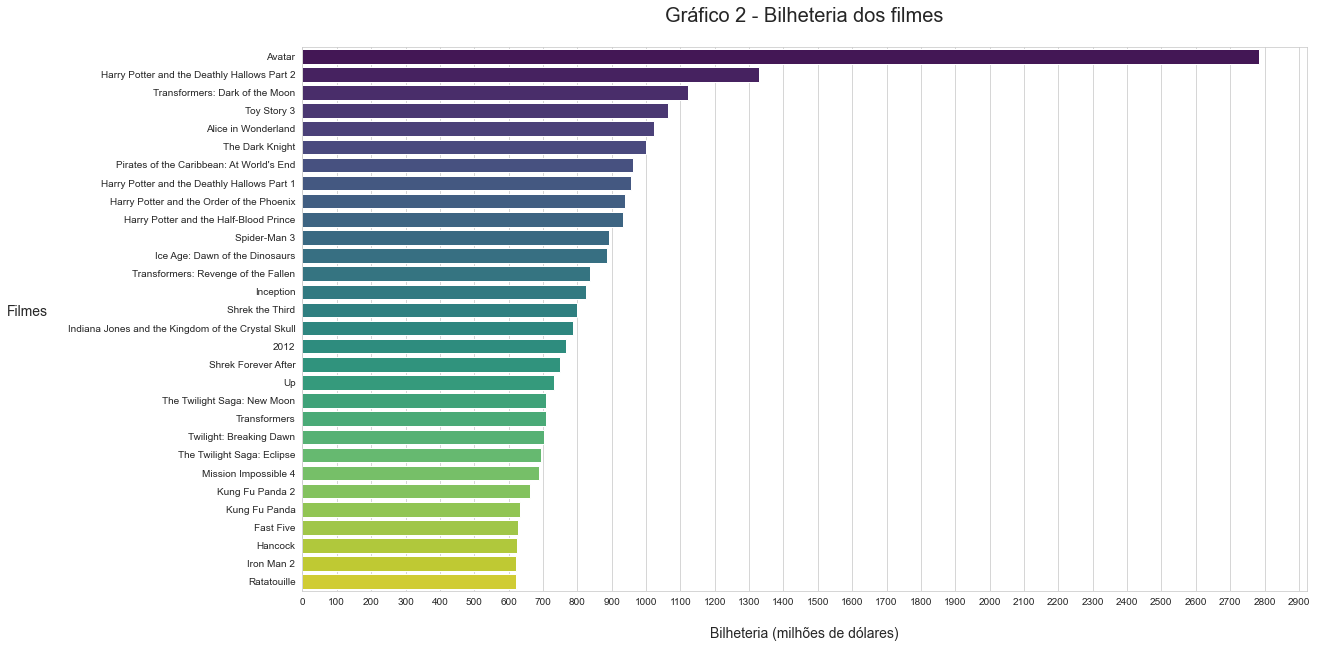

In [357]:
# Criação de um novo DataFrame, que ordena os filmes de acordo com o orçamento
df3 = df.sort_values(by='Worldwide_Gross_M',ascending=False)

# Definindo tamanho do gráfico, ativando o grid e escolhendo o barplot usando Seaborn
plt.figure(figsize=(18,10))
sns.set_style('whitegrid')
sns.barplot(x='Worldwide_Gross_M',y='Film',data=df3,palette='viridis')

# Aumentando a quantidade de valores no eixo x e definindo intervalo entre eles
plt.xticks(ticks=np.arange(0,3000,100))

# Adicionando título e nome para os eixos do gráfico 
plt.title('Gráfico 2 - Bilheteria dos filmes',fontdict={'fontsize':20},pad=25)
plt.xlabel('Bilheteria (milhões de dólares)',fontdict={'fontsize':14},labelpad=20)
plt.ylabel('Filmes',fontdict={'fontsize':14},labelpad=40,rotation=0)
plt.show()

🖋 Podemos plotar os filmes com bilheteria menor do que 800 milhões de dólares, para uma melhor visualização.

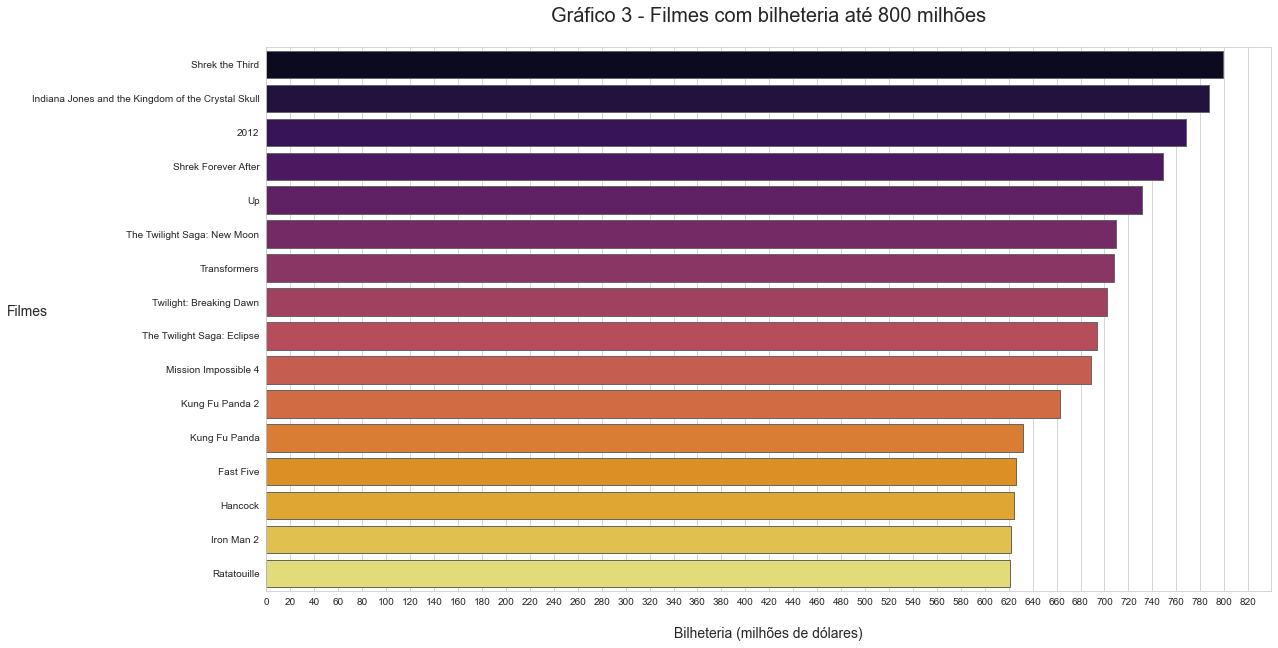

In [358]:
#Criação do novo dataset, contendo apenas os filmes com bilheteria menor que 800 milhões de dólares
df4 = df3[df3['Worldwide_Gross_M']<800]

plt.figure(figsize=(18,10))
sns.barplot(x='Worldwide_Gross_M',y='Film',data=df4,palette='inferno',edgecolor='0.4')
plt.xticks(ticks=np.arange(0,840,20))
plt.xlabel('Bilheteria (milhões de dólares)',fontdict={'fontsize':14},labelpad=20)
plt.ylabel('Filmes',fontdict={'fontsize':14},rotation=0)
plt.title('Gráfico 3 - Filmes com bilheteria até 800 milhões',fontdict={'fontsize':20},pad=25)

plt.show()

🖋 É possível visualizar que "Avatar" é o filme com maior bilheteria (pouco menos de 2,8 bilhões de dólares), enquanto "Ratatouille" é o que contou com menor retorno - pouco mais de 620 milhões de dólares. Podemos verificar se está correto usando max() e min() no DataFrame:

In [359]:
df[df['Worldwide_Gross_M']==df['Worldwide_Gross_M'].max()]

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
6,Avatar,2009,Action,2784,237


In [360]:
df[df['Worldwide_Gross_M']==df['Worldwide_Gross_M'].min()]

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
25,Ratatouille,2007,Animation,621,150


---

<b>(Questão 4)</b> Crie uma visualização que mostre a quantidade de filmes por gênero em cada ano. Em quais anos foram feitos menos filmes de ação? E em que ano foram feitos menos filmes de animação?

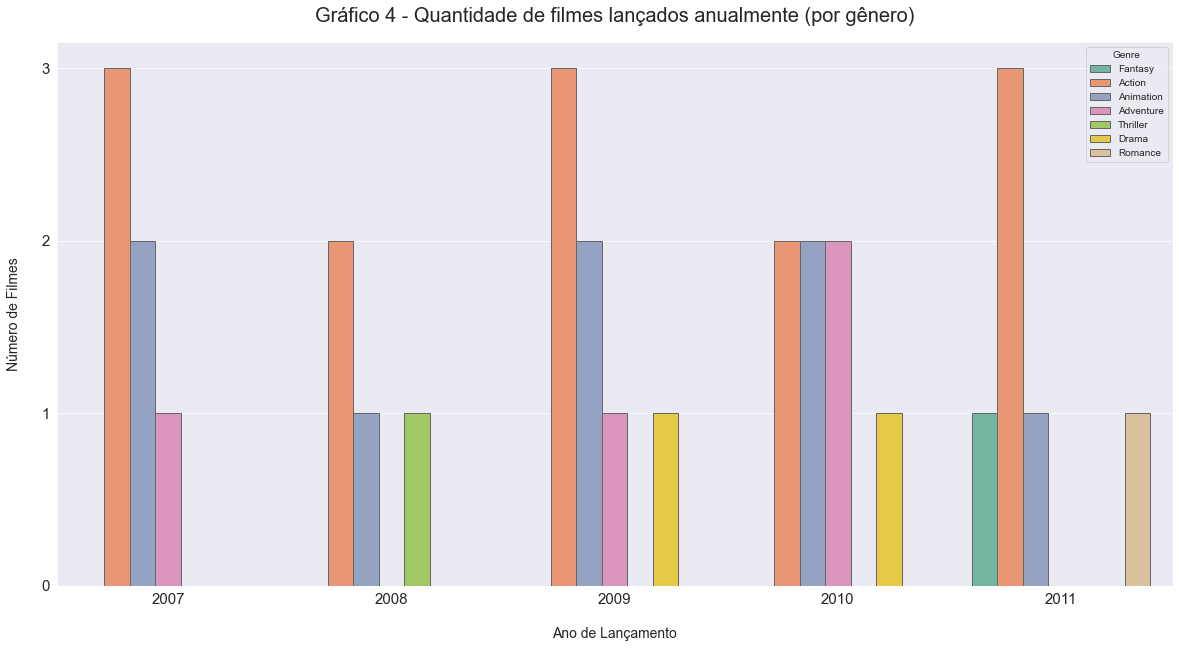

In [361]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.countplot(x='Year',data=df,palette='Set2',hue='Genre',edgecolor='0.4')
plt.yticks(ticks=np.arange(0,4,1))

plt.xlabel('Ano de Lançamento',fontdict={'fontsize':14},labelpad=20)
plt.ylabel('Número de Filmes',fontdict={'fontsize':14},labelpad=20)
plt.title('Gráfico 4 - Quantidade de filmes lançados anualmente (por gênero)',fontdict={'fontsize':20},pad=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()

🖋 É possível observar que os anos de 2008 e 2010 foram o anos com o menor número filmes de ação lançados: dois. Em 2008 e em 2011 foram os anos com menor número de filmes de animação, tendo apenas um filme lançado cada.

---

<b>(Questão 5)</b> Crie uma visualização que mostre a média de orçamento de filmes por gênero em cada ano. Em que ano os filmes de ação tiveram maior média de orçamento? E em que ano os filmes de animação tiveram a maior média de orçamento?

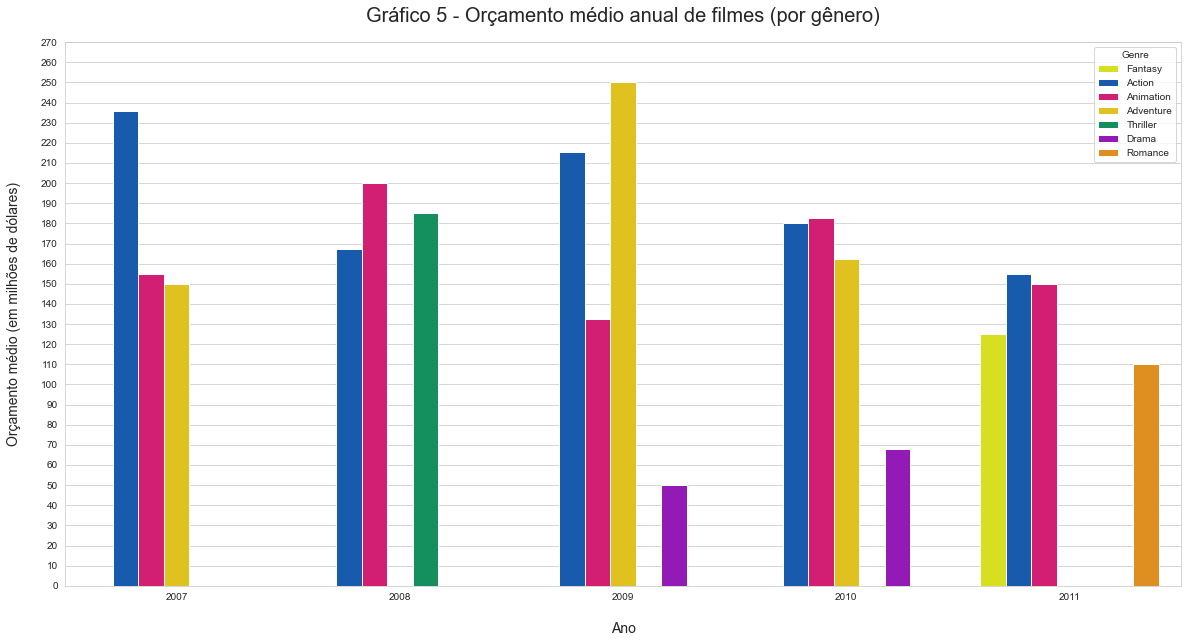

In [362]:
plt.figure(figsize=(20,10))

sns.set_style('whitegrid')
sns.barplot(x='Year',y='Budget_M',hue='Genre',data=df,ci=None,palette='prism')
plt.yticks(ticks=np.arange(0,280,10))
plt.title('Gráfico 5 - Orçamento médio anual de filmes (por gênero)',fontdict={'fontsize':20},pad=20)
plt.xlabel('Ano',fontdict={'fontsize':14},labelpad=20)
plt.ylabel('Orçamento médio (em milhões de dólares)',fontdict={'fontsize':14},labelpad=20)

plt.show()

🖋 Os filmes de ação tiveram maior média de orçamento no ano de 2007, em torno de 235 milhões de dólares. Os filmes de animação tiveram maior média de orçamento no ano de 2008 com 200 milhões de dólares.

<b>Obrigado!</b>

---